In [1]:
import pandas as pd
import passenger_pred.load as ppl
import passenger_pred.preprocess as ppp
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

In [43]:
B6_DIR = "../data/B6/"

df_b6 = pd.read_csv(B6_DIR + "B6_20211028_20211121.csv")
df_b6.shape

(909698, 24)

In [47]:
df_b6 = ppp.add_uid(df_b6)
df_b6 = ppp.remove_duplicate_stops(df_b6)
df_b6 = fill_zero_passengers(df_b6)
df_b6.shape

(501604, 25)

In [48]:
df_b6[df_b6.passenger_count == "None"].shape

(127367, 25)

In [15]:
df_share_of_none = df_b6.groupby("uid").passenger_count.apply(lambda x: x[x == "None"].count()) / df_b6.groupby("uid").passenger_count.size()

<AxesSubplot:>

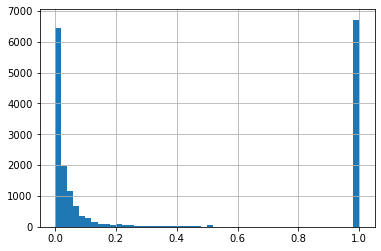

In [19]:
df_share_of_none.hist(bins=50)

In [30]:
fill_trips = df_share_of_none[df_share_of_none < 0.95].index

In [36]:
df_b6.loc[(df_b6.uid.isin(fill_trips) & (df_b6.passenger_count == "None")), 'passenger_count'] = 0

In [39]:
df_b6[df_b6.passenger_count == "None"].shape

(127367, 25)

In [46]:
def fill_zero_passengers(df, threshold=0.95):
    df.passenger_count = df.passenger_count.fillna("None")
    df_share_of_none = df.groupby("uid").passenger_count.apply(
        lambda x: x[x == "None"].count()
    ) / df.groupby("uid").passenger_count.size()
    fill_trips = df_share_of_none[df_share_of_none < threshold].index
    df.loc[(df.uid.isin(fill_trips) & (df.passenger_count == "None")), 'passenger_count'] = 0
    return df